In [204]:
# activate plotting
%matplotlib notebook

# import dependencies
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import pandas as pd
import seaborn as sns
import scipy.stats as st

# set color palette
palette = sns.color_palette(
    "ch:s=.25,rot=-.25", 
    as_cmap = True
)

# set theme
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('crest')

# set output file directory
output_img = "../resources/assets/images/"

In [155]:
# file path
input_file = '../resources/orders.csv'

# create dataframe, set encoding for file
raw = pd.read_csv(input_file, encoding='ISO-8859-1').set_index(['Row ID']).dropna()
print('Row Count:  '+ str(len(raw)))

# return first 5 results
raw.head(5)

Row Count:  9994


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [156]:
# check data types
raw.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [157]:
# adjust data types
raw[['Order Date', 'Ship Date']] = raw[['Order Date', 'Ship Date']].astype('datetime64')
print(raw.dtypes)

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [158]:
# define function for regression and correlation coefficient
def regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    plt.grid(True)
    plt.plot(
        x_values, regress_values,
        "r-",
        c = '#FFBF00',
        label = 'Liner Regression'
    )
    plt.scatter(
        x_values, y_values,
        marker = '.', 
        c = '#3D2B1F',
        label = 'Order'
    )
    plt.legend(
        loc = 'best',
        fancybox = True,
        fontsize = 8,
        framealpha = 1
    )
    plt.ylabel('Discount')
    plt.tight_layout()
    plt.show()
    cc = round(st.pearsonr(x_values, y_values)[0], 2)
    print(f"The correlation coefficient is {cc}")

In [177]:
# create df, group profit with category
pybarh = raw.groupby('Category')['Profit'].sum().nsmallest(3)

# create bar plot using pandas
ax_bar = pybarh.plot(
    kind = 'barh',
    align = 'center',
    width = 0.75
)

# format plot
ax_bar.set_xlabel('Profit $')
ax_bar.set_ylabel('Category')

# display plot
plt.tight_layout()
plt.show()

#segment region category

<IPython.core.display.Javascript object>

In [178]:
# create df, group profit with region
pybarh = raw.groupby('Region')['Profit'].sum().nsmallest(4)

# create bar plot using pandas
ax_bar = pybarh.plot(
    kind = 'barh',
    align = 'center',
    width = 0.75,
    title = 'Total Profit for Each Region'
)

# format plot
ax_bar.set_xlabel('Profit ($)')
ax_bar.set_ylabel('Region')

# display plot
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [179]:
# create df, group profit with region
pybarv = raw.groupby('Segment')['Profit'].sum().nsmallest(40)

# create bar plot using pandas
ax_bar = pybarv.plot(
    kind = 'barh',
    linestyle = 'solid',
    align = 'center',
    width = 0.75,
    title = 'Total Profit for Each Segment'
)

# format plot
ax_bar.set_xlabel('Profit ($)')
ax_bar.set_ylabel('Segment')

# display plot
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [180]:
raw['Order Date'] = raw['Order Date'].dt.date

AttributeError: Can only use .dt accessor with datetimelike values

In [181]:
profits = raw
profits['Order Year'] = None

for index, row in profits2.iterrows():
    marker = row['Order Date'].strftime('%Y')
    profits.loc[index,'Order Year'] = marker

In [182]:
profits = raw.groupby('Order Year')['Profit'].agg(['sum'])

profits = profits.rename(
    columns = {
        'sum' : 'Total Profit'
    }
).rename_axis('Year')

In [183]:
profits.plot()
plt.title('Annual Store Profits', size = 14)
plt.xlabel('Year', size = 11)
plt.ylabel('Profit', size = 11)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


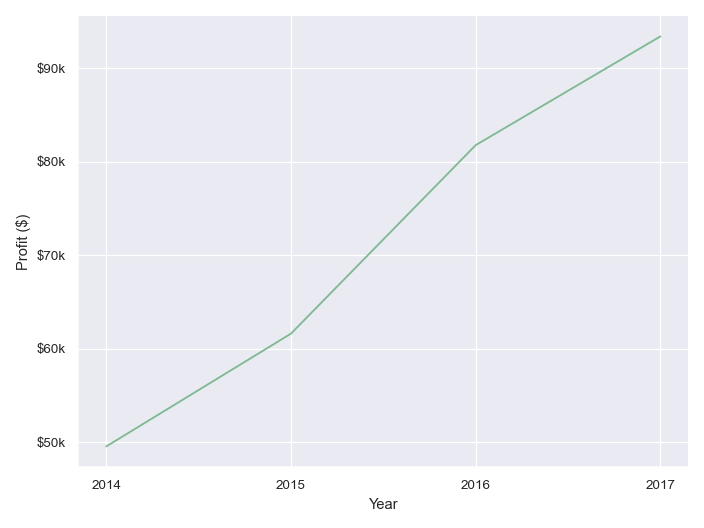

<ipython-input-205-ff0cb5be9fe3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


In [205]:
ax = sns.lineplot(
    data = profits,
    x = 'Year',
    y = 'Total Profit'
)
ax.set_xlabel('Year')
ax.set_ylabel('Profit ($)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ylabels = ['${:,.0f}k'.format(y) for y in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)

plt.tight_layout()
plt.savefig(output_img + 'annual_profits.png')
plt.show()